In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

General imported data where:
  1. **X-axis**: Represents the Country.
  2. **Y-axis:** Represents the Dimension Value (the specific metric being plotted).
  3. **Bars**: Each country will have four bars, one for each GPT model and human evaluation

In [4]:
# Tollerance of Ambiguity Test
general_tollerance_of_ambiguity_data = {
    "Country": ["IT Employees MK", "IT Employees CA", "IT Employees SP", "IT Employees ARG", "IT Employees GER", "IT Employees MAL", "IT Employees UK", "Business Students USA", "IT Management Students MK"],
    "Novelty - gpt-3.5-turbo": [3.125, 2.958333333, 2.916666667, 2.875, 3.166666667, 2.958333333, 3.25, 3, 2.25],
    "Complexity - gpt-3.5-turbo": [5.166666667, 5.3125, 5.125, 5.104166667, 5.4375, 5.5625, 5.354166667, 4.125, 5.125],
    "Insolubility - gpt-3.5-turbo": [5.888888889, 5.111111111, 5.777777778, 5.055555556, 5.555555556, 5.333333333, 5.444444444, 5.666667, 5.333333333],
    "Novelty - gpt-4-turbo": [4.666666667, 5, 4.666666667, 4.583333333, 4.625, 4.541666667, 4.541666667, 4.5, 5],
    "Complexity - gpt-4-turbo": [6.125, 6.125, 6.166666667, 6.1875, 6.145833333, 6.104166667, 6.25, 6, 6.25],
    "Insolubility - gpt-4-turbo": [5.055555556, 5.388888889, 5.111111111, 5.055555556, 5.222222222, 5.222222222, 5.166666667, 5, 5],
    "Novelty - gpt-4o": [5.916666667, 5.125, 5.25, 5.583333333, 5.458333333, 6.125, 5.25, 5.25, 5.25],
    "Complexity - gpt-4o": [5.625, 5.666666667, 5.333333333, 5.791666667, 5.6875, 5.666666667, 5.645833333, 5.875, 6],
    "Insolubility - gpt-4o": [4.944444444, 5, 5.055555556, 4.944444444, 5.055555556, 4.833333333, 5, 5, 5.333333333],
    "Novelty - o4-mini": [4.66666667, 4.208333, 4.4583333, 4.4583333, 5.5416667, 4.4166667, 4.8333333, 4.23, 4.5],
    "Complexity - o4-mini": [5.20833333, 5.25, 5.47916667, 5.5625, 4.6458333, 5.375, 4.9166667, 5.38, 5.5],
    "Insolubility - o4-mini": [4.88888889, 4.16666667, 4.6666667, 4.8333333, 4.2222222, 4.5555555, 4.611111, 4.33, 4.666667],
    "Novelty - gpt-4.1-nano": [4.875, 4.625, 4.70833333, 4.5833333, 4.41666667, 4.625, 4.875, 5.25, 5.75],
    "Complexity - gpt-4.1-nano": [4.91666667,4.91666667,4.85416667, 4.8333333,4.91666667, 4.89583333, 5.16666667, 5.38,5.25],
    "Insolubility - gpt-4.1-nano": [5.3333333, 5.3333333, 5.3333333, 5.3333333, 5.3333333, 5.27777778, 5.27777778, 5.33, 6],
    "Novelty - gemma2": [4.375, 4.375, 4.333333333, 4.375, 4.333333333, 4.458333, 4.333333333, 4.75, 4.5],
    "Complexity - gemma2": [5.77083333, 5.70833333, 5.75, 5.875, 5.833333, 5.77083333, 5.8125, 5.87, 5.75],
    "Insolubility - gemma2": [5.8888889, 5.1111111, 5.9444, 6.11111, 5.222222, 5.66667, 5.111111, 4.67, 5.33333],
    "Novelty - Human": [3.25, 3.25, 3.167, 3.348, 3.469, 3.667, 3.143, "", 4.77],
    "Complexity - Human": [3.656, 3.542, 3.388, 3.781, 3.708, 3.313, 3.196, "",5.458],
    "Insolubility - Human": [3.167, 3, 3.026, 3.44, 3.292, 3.222, 3.429, "",4.72133]
}

df_ToAM = pd.DataFrame(general_tollerance_of_ambiguity_data)

In [5]:
# Cognitive Style Test
general_cognitive_style_data = {
    "Country": ["IT Employees MK", "IT Employees CA", "IT Employees SP", "IT Employees ARG", "IT Employees GER", "IT Employees MAL", "IT Employees UK", "Business Students USA", "IT Management Students MK"],
    "Knowing - gpt-3.5-turbo": [4.13, 3.958333333, 4.041666667, 4.083333333, 4.166666667, 4.208333333, 4.041666667, 4.50, 4.25],
    "Planning - gpt-3.5-turbo": [4.333333333, 4.285714286, 4.095238095, 4.142857143, 4.452380952, 4.285714286, 4.166666667, 4.428571429, 4.142857143],
    "Creating - gpt-3.5-turbo": [3.595238096, 3.428571429, 3.404761905, 3.380952381, 3.476190476, 3.833333333, 3.357142857, 4.428571429, 4],
    "Knowing - gpt-4-turbo": [4.75, 4.75, 4.75, 4.666666667, 4.916666667, 4.833333333, 4.75, 5, 5],
    "Planning - gpt-4-turbo": [4.952380952, 4.80952381, 4.809523809, 4.928571429, 5, 4.928571429, 4.857142857, 5, 5],
    "Creating - gpt-4-turbo": [4.095148095, 4.190476191, 4.047619048, 4.333333333, 4.071428572, 4.357142857, 4.071428572, 4.71428571, 5],
    "Knowing - gpt-4o": [5, 5, 5, 5, 5, 5, 5, 5, 5],
    "Planning - gpt-4o": [5, 5, 5, 5, 5, 4.952380952, 4.976190476, 5, 4.142857143],
    "Creating - gpt-4o": [4.095238095, 4.261904762, 4.261904762, 4.261904762, 4.095238095, 4.095238095, 4.214285714, 4.71428571, 4.428571429],
    "Knowing - o4-mini": [4.71, 4, 4.7916667, 4.875, 4.9166667, 4.375, 4.691, 5,5],
    "Planning - o4-mini": [4.61, 3.92, 4.52, 4.856, 5, 4.496667, 4.641667, 4.71, 5],
    "Creating - o4-mini": [3.735, 3.26, 3.97, 3.78, 3.708, 3.94, 3.971, 4.85, 3.71],
    "Knowing - gpt-4.1-nano": [4, 4, 3.875, 4, 4, 4, 4, 5, 4.5],
    "Planning - gpt-4.1-nano": [3.99666, 3.925, 3.92666, 3.85333, 3.7866, 3.90166, 3.948333, 5, 4.28],
    "Creating - gpt-4.1-nano": [3.541, 3.59, 3.56666, 3.4466, 3.61333, 3.51833, 3.66166, 5, 4.71],
    "Knowing - gemma2": [5, 4.958, 4.916, 5, 5, 4.916, 4.916, 5, 5],
    "Planning - gemma2": [4.875, 4.8278, 4.851, 4.925, 5, 4.875, 4.851, 4.85, 4.85],
    "Creating - gemma2": [4.07, 4.0933,4.0933 , 4.11667, 3.87833, 4.07, 4.07, 4.14, 4.14],
    "Knowing - Human": [4.473, 4.25, 4.208, 4.188, 3.885, 4.365, 3.571, 4.06, 4.28],
    "Planning - Human": [4.413, 4.429, 3.905, 3.964, 3.648, 3.982, 4.184, 3.81, 4.20666],
    "Creating - Human": [4.097, 3.667, 4.095, 3.786, 3.476, 3.857, 3.918, 4.16, 3.79666]
}

df_CS = pd.DataFrame(general_cognitive_style_data)

In [6]:
# Innovative Attitude Test

general_innovative_attitude_data = {
    # "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom", "USA"],
    "Country": ["IT Employees MK", "IT Employees CA", "IT Employees SP", "IT Employees ARG", "IT Employees GER", "IT Employees MAL", "IT Employees UK", "Business Students USA", "IT Management Students MK"],
    "Innovative Attitude - gpt-3.5-turbo": [80.66666667, 82.83333333, 80.83333333, 81, 81, 81.33333333, 81.5, 100, 100],
    "Innovative Attitude - gpt-4-turbo": [93.66666667, 94.5, 93.66666667, 93, 91.16666667, 96.66666667, 88.33333333, 81, 80],
    "Innovative Attitude - gpt-4o": [87.66666667, 88.16666667, 89, 87.5, 88.5, 87.5, 87.83333333, 91, 88],
    "Innovative Attitude - o4-mini": [77.67, 82.5, 79.16666, 80.333, 72.5, 79.833, 81.5, 82,84],
    "Innovative Attitude - gpt-4.1-nano": [96.33, 95.3333, 95.3333, 93.66667, 94.3333, 95, 95.3333, 99,99],
    "Innovative Attitude - gemma2": [59, 74.8333, 66.5, 67.66667, 64.83,65.16666, 68.16666, 76, 70],
    "Innovative Attitude - Human": [68.75, 83.00, 70.72, 81.21, 76.46, 81.00, 67.71, 72.41, 72]
}

df_IA = pd.DataFrame(general_innovative_attitude_data)

In [25]:
general_EM_data_users = {
    "Country": ["IT Employees MK", "IT Employees CA", "IT Employees SP", "IT Employees ARG", "IT Employees GER", "IT Employees MAL", "IT Employees UK", "Business Students USA", "IT Management Students MK"],
    "Emotional Response - gpt-3.5-turbo": [28.33, 28.33, 28.33, 26.66, 26.66, 28.33, 26.66, 30, 30],
    "Emotional Response - gpt-4-turbo": [20,20,20,20,20,20,20,30,20],
    "Emotional Response - gpt-4o": [28.33,30,30,30,30,30,30,30,20],
    "Emotional Response - o4-mini": [26.67, 27.5, 20,17.5, 23.33, 20.83, 28.33, 25,10],
    "Emotional Response - gpt-4.1-nano": [20,20,20,20,20,20,20,20,20],
    "Emotional Response - gemma2": [20,20,20,20,20,20,20,30,20],
    "Emotional Response - Human": [19.75,21,16.44,19.68, 20.63, 19.5,13,18.5, 20.4],
}
df_EM = pd.DataFrame(general_EM_data_users)

In [24]:
# Locus of Control Test

general_locus_of_control_data = {
    "Country": ["IT Employees MK", "IT Employees CA", "IT Employees SP", "IT Employees ARG", "IT Employees GER", "IT Employees MAL", "IT Employees UK", "Business Students USA", "IT Management Students MK"],
    "Locus of Control - gpt-3.5-turbo": [5.5, 4.833333333, 4.833333333, 4.833333333, 4.833333333, 5.166666667, 5, 5,5],
    "Locus of Control - gpt-4-turbo": [1.166666667, 0.5, 1, 0.833333333, 0.833333333, 0.666666667, 0.833333333, 0.0001, 1],
    "Locus of Control - gpt-4o": [1, 1, 1, 1, 1, 0.833333333, 0.833333333, 0.0001, 0],
    "Locus of Control - o4-mini": [0.67, 0.17, 0.33, 0,0,0, 0.17, 0,0],
    "Locus of Control - gpt-4.1-nano": [1.5, 1.33, 1.17, 1.5, 1,1.5,0.67, 0,1],
    "Locus of Control - gemma2": [2, 0.33, 1.17, 1.67, 0.33, 1, 1.33, 0,2],
    "Locus of Control - Human": [7.25, 3.333, 7.795, 6.036, 7.292, 6.167, 9.429, 5.19, 5.0005]
}

df_LoC = pd.DataFrame(general_locus_of_control_data)

In [39]:
# Fixed colors for all models across all plots
MODEL_COLOR_PALETTE = {
    "gpt-3.5-turbo": "#609e6e",
    "gpt-4-turbo": "#b55d60",
    "gpt-4.1-nano": "#857aac",
    "gpt-4o": "#8d7867",
    "o4-mini": "#d095bf",
    "gemma2": "#cc8a64",
     "Human": "#5975a4",
}

def plot_grouped_metric_comparison(df, dimension, xlabel, ylabel, title=None):
    df_melted = pd.melt(df, id_vars=["Country"], var_name="Dimension", value_name="Value")
    df_melted[['Dimension Type', 'Model']] = df_melted['Dimension'].str.extract(r'^(.*?)\s*-\s*(.*)$')
    df_filtered = df_melted[df_melted['Dimension Type'] == dimension].copy()
    df_filtered['Value'] = pd.to_numeric(df_filtered['Value'], errors='coerce')
    df_filtered.dropna(subset=['Value'], inplace=True)

    def map_group(country):
        country = country.strip()
        if country.startswith("IT Employees"):
            return "IT Employees"
        elif country == "Business Students USA":
            return "Business Students USA"
        elif country == "IT Management Students MK":
            return "IT Management Students MK"
        else:
            return None

    df_filtered['Group'] = df_filtered['Country'].apply(map_group)
    df_filtered = df_filtered[df_filtered['Group'].notna()]
    df_grouped = df_filtered.groupby(['Group', 'Model'], as_index=False)['Value'].mean()

    # Only keep colors for models present in data
    models_present = df_grouped['Model'].unique()
    # filtered_palette = {k: v for k, v in MODEL_COLOR_PALETTE.items() if k in models_present}

    hue_order = [model for model in MODEL_COLOR_PALETTE.keys() if model in models_present]
    filtered_palette = {k: MODEL_COLOR_PALETTE[k] for k in hue_order}

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    group_order = ["IT Employees", "Business Students USA", "IT Management Students MK"]

    barplot = sns.barplot(
        data=df_grouped,
        x="Group",
        y="Value",
        hue="Model",
        order=group_order,
        hue_order=hue_order,  # <<--- Enforce fixed model order
        palette=filtered_palette,
        zorder=3
    )

    num_models = df_filtered['Model'].nunique()
    offset_step = 0.05

    for i, p in enumerate(barplot.patches):
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y_offset = ((i % num_models) - (num_models - 1) / 2) * offset_step
            y = height / 2 + y_offset
            barplot.annotate(
                f'{height:.2f}',
                (x, y),
                ha='center', va='center',
                fontsize=10,
                color='white',
                rotation=45
            )

    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
    plt.xticks(rotation=0)
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    plt.title(title if title else f"Comparison for Dimension: {dimension}", fontsize=16, pad=20)
    plt.ylim(0, df_grouped['Value'].max() * 1.15)
    plt.legend(title="Model", loc='upper right', ncol=2)
    plt.tight_layout()
    plt.show()

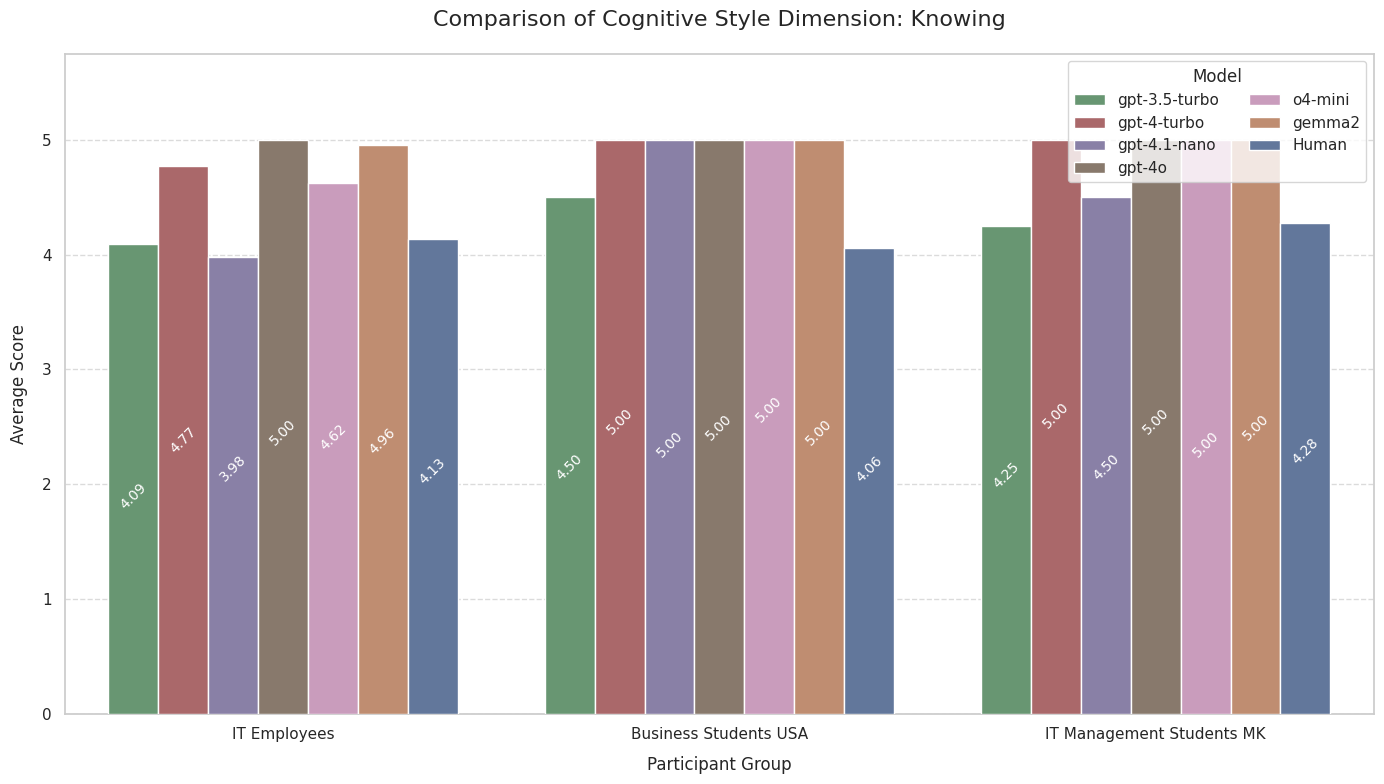

In [40]:
plot_grouped_metric_comparison(
    df=df_CS,
    dimension="Knowing",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Comparison of Cognitive Style Dimension: Knowing"
)

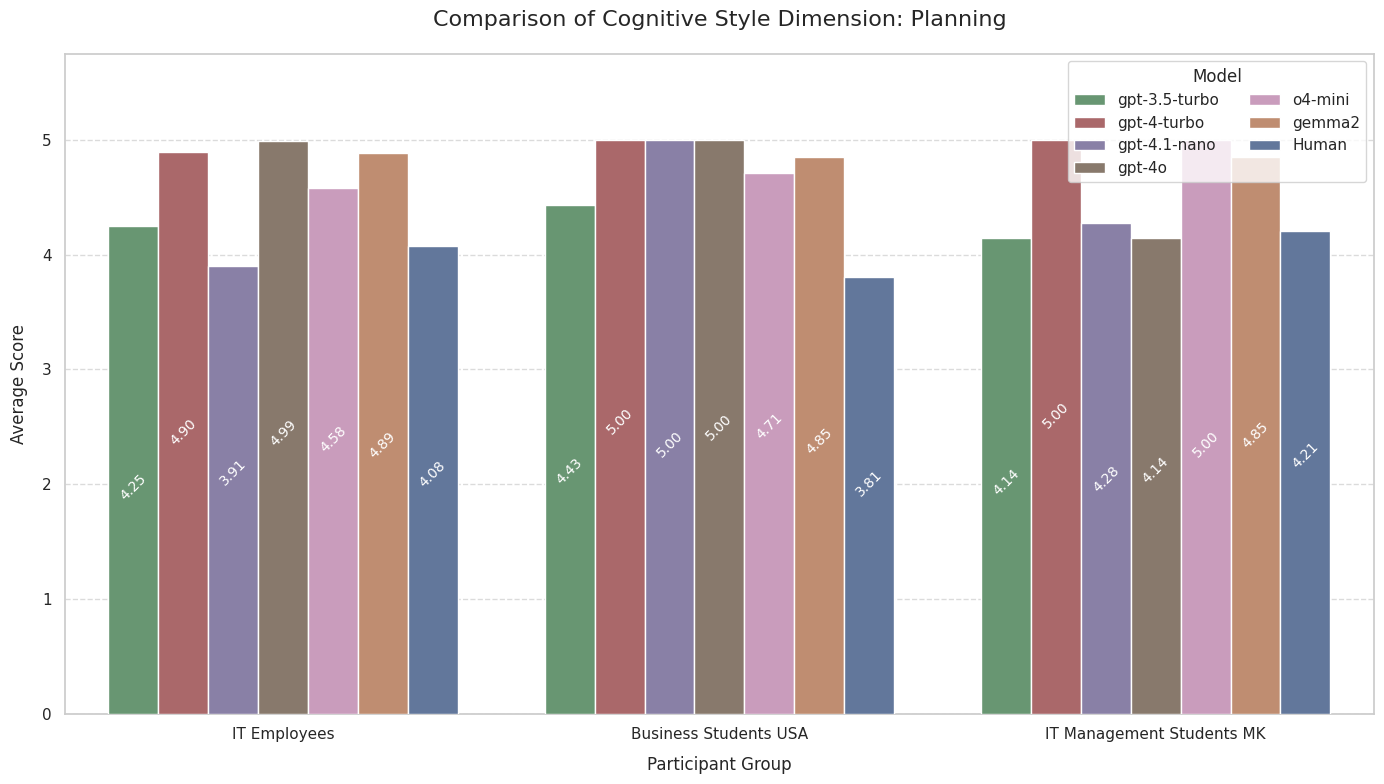

In [41]:
plot_grouped_metric_comparison(
    df=df_CS,
    dimension="Planning",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Comparison of Cognitive Style Dimension: Planning"
)

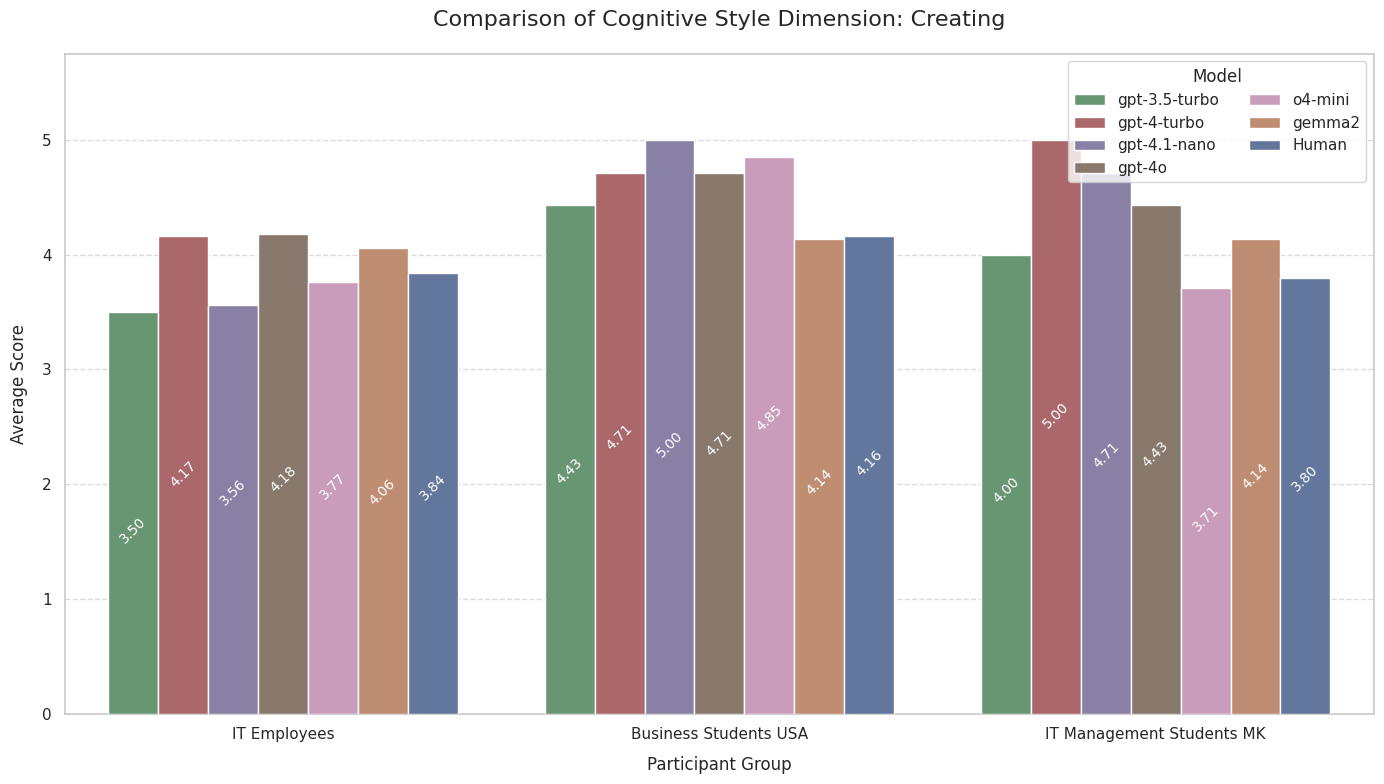

In [42]:
plot_grouped_metric_comparison(
    df=df_CS,
    dimension="Creating",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Comparison of Cognitive Style Dimension: Creating"
)

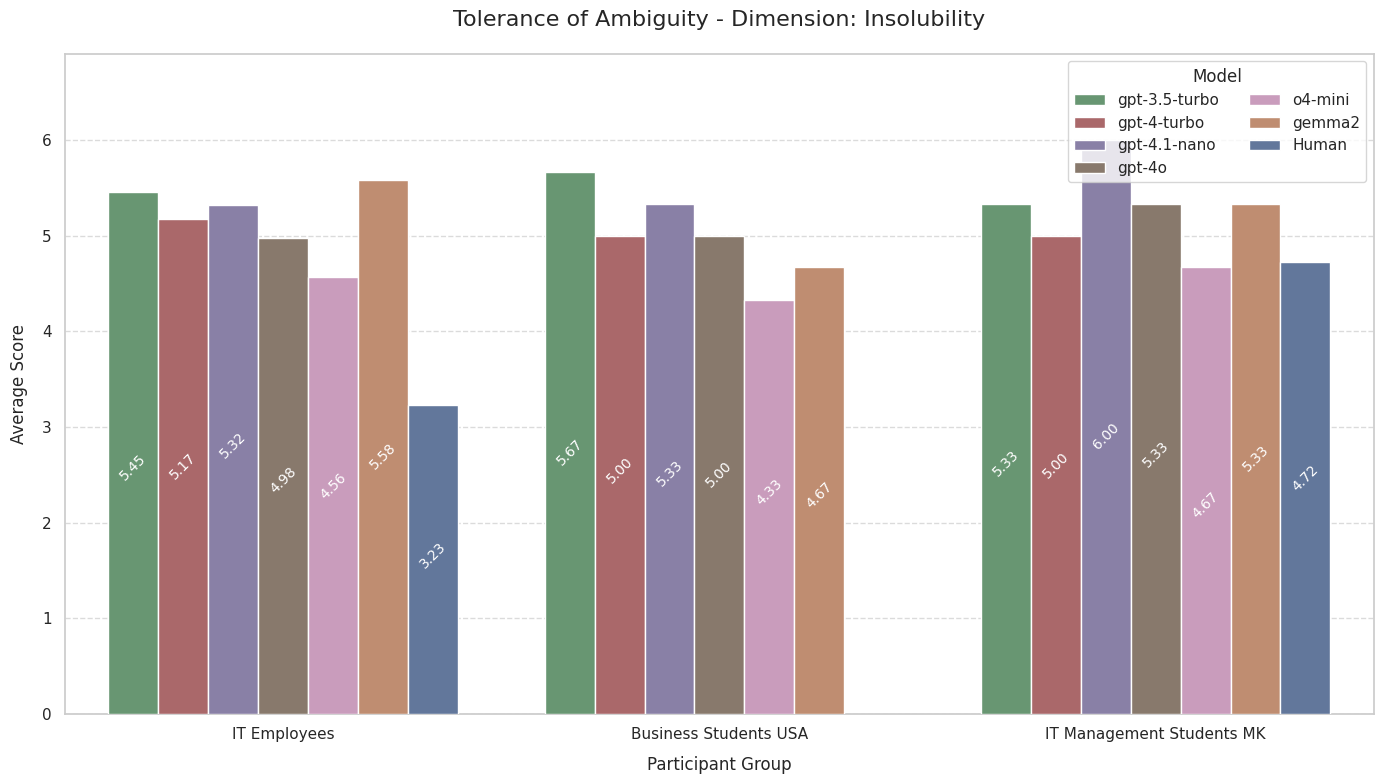

In [48]:
plot_grouped_metric_comparison(
    df=df_ToAM,
    dimension="Insolubility",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Tolerance of Ambiguity - Dimension: Insolubility"
)

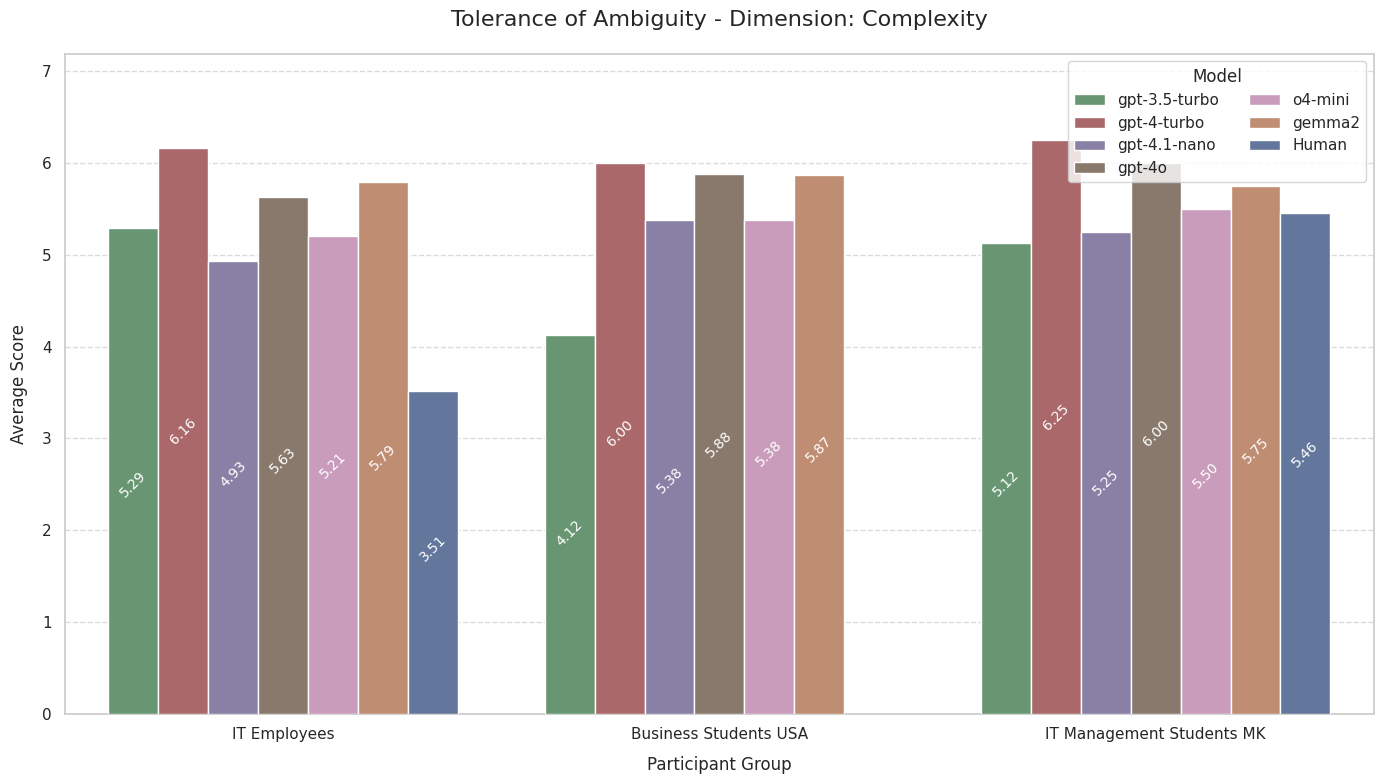

In [43]:
plot_grouped_metric_comparison(
    df=df_ToAM,
    dimension="Complexity",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Tolerance of Ambiguity - Dimension: Complexity"
)

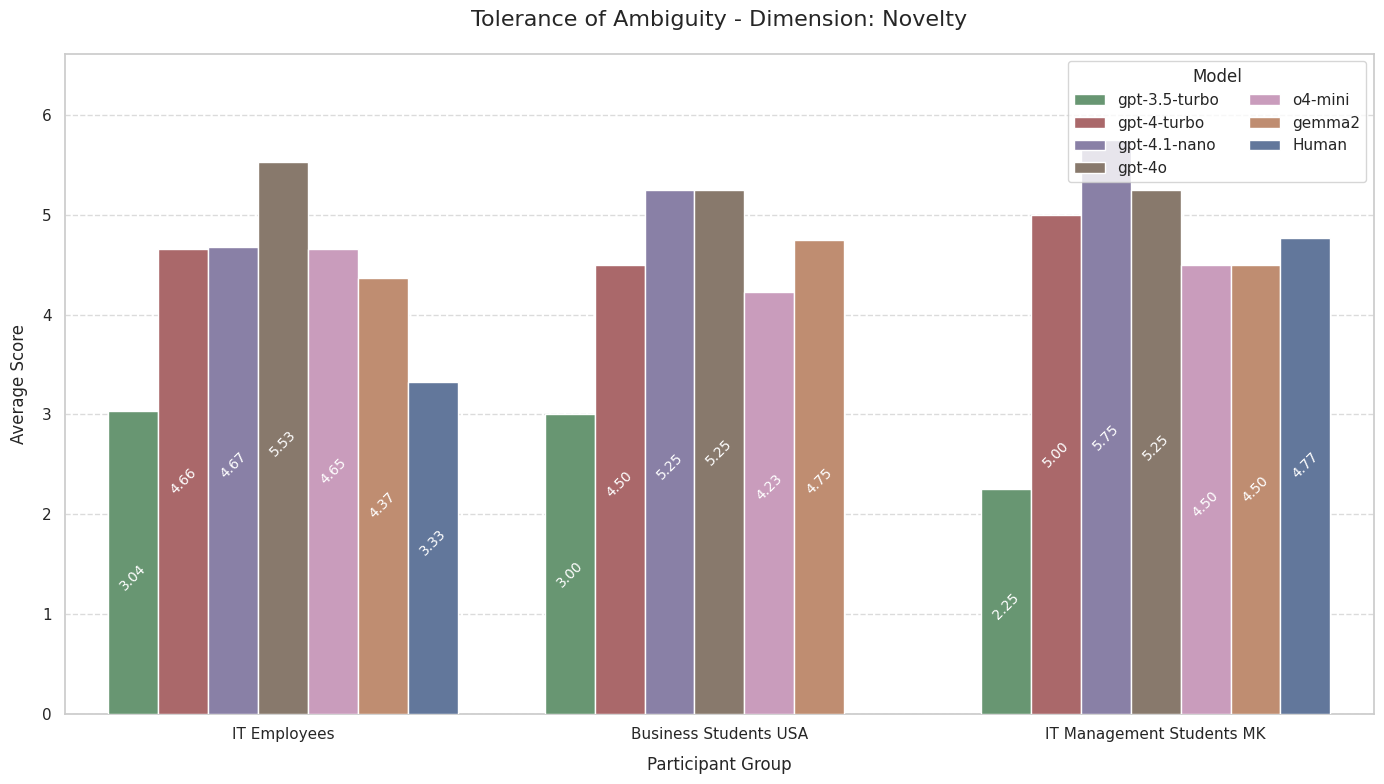

In [44]:
plot_grouped_metric_comparison(
    df=df_ToAM,
    dimension="Novelty",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Tolerance of Ambiguity - Dimension: Novelty"
)

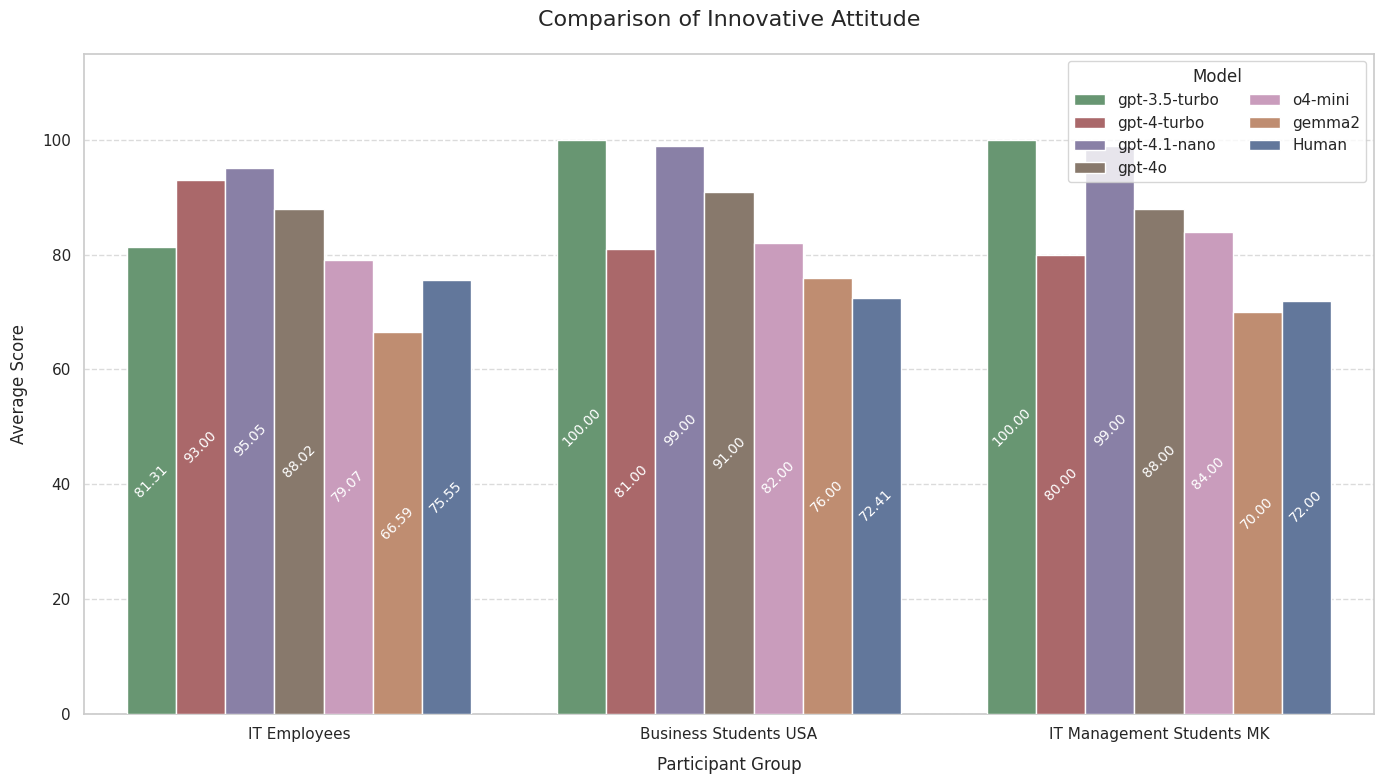

In [45]:
plot_grouped_metric_comparison(
    df=df_IA,
    dimension="Innovative Attitude",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Comparison of Innovative Attitude"
)

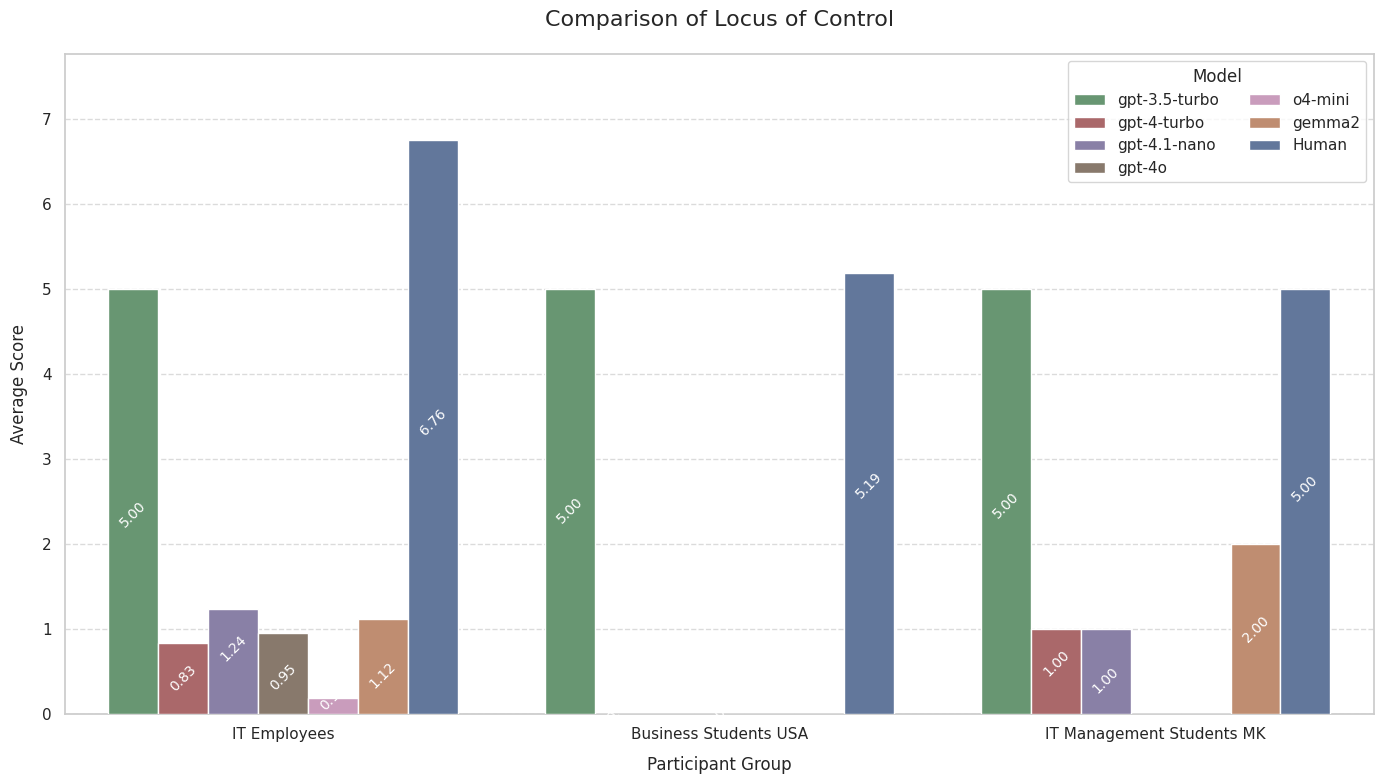

In [46]:
plot_grouped_metric_comparison(
    df=df_LoC,
    dimension="Locus of Control",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Comparison of Locus of Control"
)

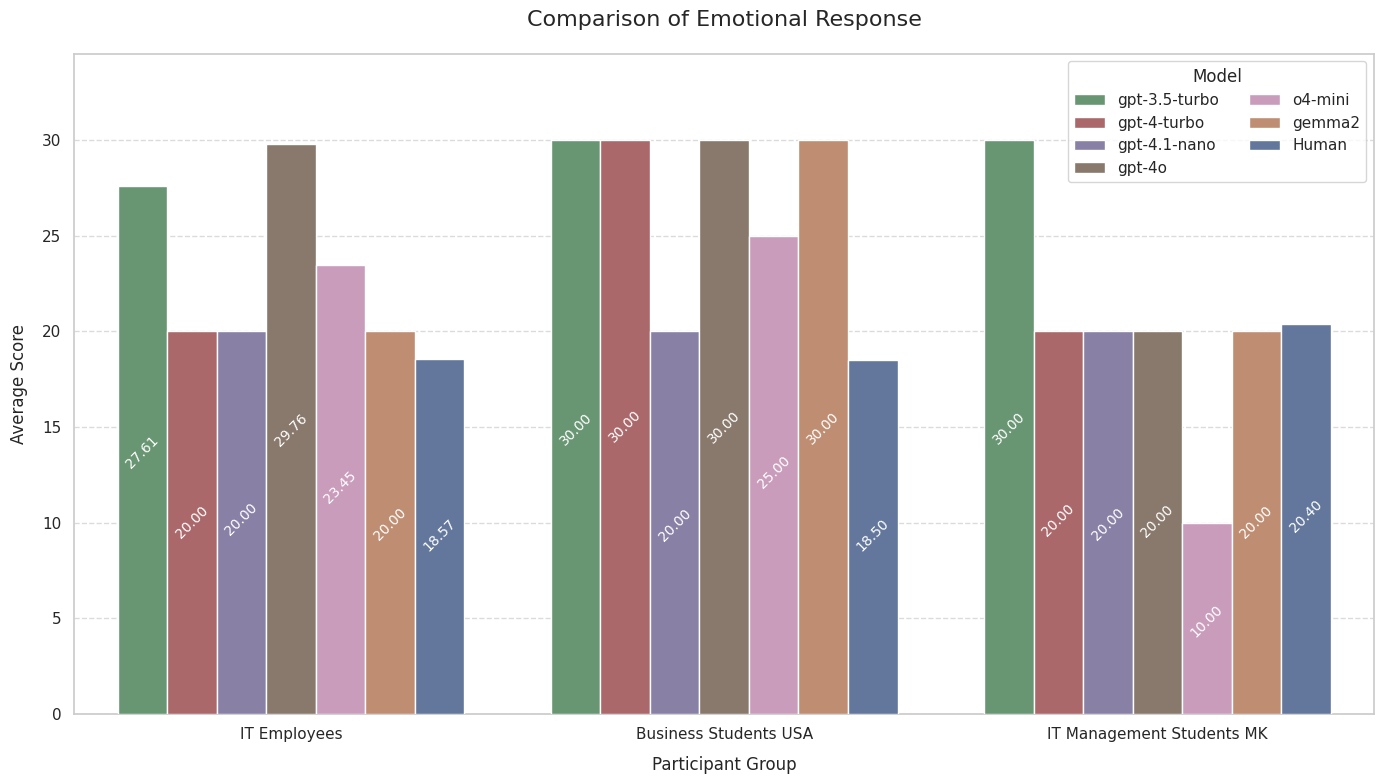

In [47]:
plot_grouped_metric_comparison(
    df=df_EM,
    dimension="Emotional Response",
    xlabel="Participant Group",
    ylabel="Average Score",
    title="Comparison of Emotional Response"
)